In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

In [2]:
# Load the data set
data = pd.read_csv('Linear_Regression_House_Dataset.csv')
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
# Print the shape of dataset
print(data.shape)

(4600, 18)


In [4]:
# Make a list of important features which is need to be included in training data
f = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 
     'yr_renovated']

data = data[f]
print(data.shape)

(4600, 10)


In [5]:
# Drop the missing values
data = data.dropna()
print(data.shape)

(4600, 10)


In [6]:
 #Get statictial information about the dataset
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.512065,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,0.538288,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,1.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,1.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,1.500000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,2.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,3.500000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
# Now , divide the dataset into two parts : independent variables and dependent variables
X = data[f[1:]]
y = data['price']

In [8]:
# Split the dataset into traning data and test data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(3680, 9)
(920, 9)
(3680,)
(920,)


In [9]:
# Fit the regression model
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)


[-7.34290433e+04  4.08765071e+04  2.00843741e+02  7.95669395e+04
  2.83940455e+04  9.14297116e+01  1.09414029e+02 -2.81179874e+03
  9.76260872e+00]


In [10]:
# Create the predictions
y_test_predict = lr.predict(X_test)
print(y_test_predict.shape)

(920,)


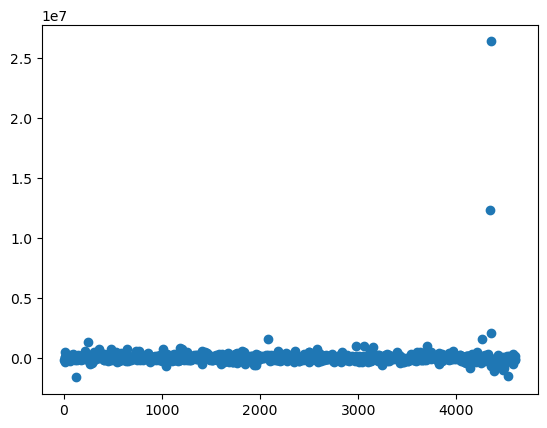

In [11]:
#Plot the error
g=plt.plot((y_test - y_test_predict),marker='o',linestyle='')

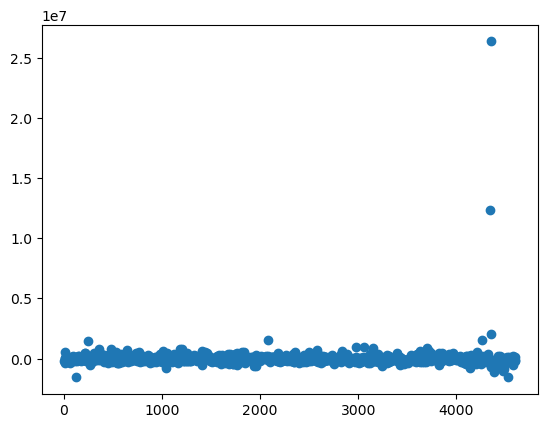

In [12]:
# # Fit the regression model without b(w0)
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train,y_train)

y_test_predict = lr.predict(X_test)

g=plt.plot((y_test - y_test_predict),marker='o',linestyle='')